<a href="https://colab.research.google.com/github/Vivek199807/ML-/blob/main/Customer_Seg_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Customer Segmentation**

Project Type - Segmentation

Contribution - Individual

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

In the retail industry, understanding customer behavior and preferences is crucial for driving sales, improving customer retention, and enhancing overall business performance. However, not all customers are the same, and a one-size-fits-all approach to marketing and sales can lead to missed opportunities. This is where customer segmentation becomes invaluable. By dividing the customer base into distinct segments based on shared characteristics, such as purchasing behavior, demographics, or preferences, retailers can tailor their marketing strategies, product offerings, and customer service to meet the specific needs of each group.

The main objective of a retail customer segmentation project is to create a detailed and actionable segmentation model that identifies different customer groups within the broader customer base. This model allows retailers to understand the unique needs and value of each segment, enabling more targeted marketing efforts, personalized product recommendations, and optimized inventory management. For example, high-value customers may receive exclusive offers, while price-sensitive customers might be targeted with promotions and discounts. Such segmentation not only increases customer satisfaction but also maximizes the efficiency of marketing spend.

By leveraging customer segmentation, retailers can also identify potential growth opportunities and areas for improvement. For instance, if a particular segment shows a high churn rate, the retailer can investigate the reasons behind it and implement strategies to retain those customers.

# **GitHub Link -**

# ***Let's Begin !***

##Import the libraries and the dataset to understand the variables present

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [18,7]
sns.set(rc={'figure.figsize':(18,7)})

<ipython-input-1-9959a3fe7d55>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
# loading the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
retail_df=pd.read_csv('/content/drive/MyDrive/alma/Online Retail.csv')

In [ ]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
#Top 5 rows of data
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Bottom 5 rows of data
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# Number of records present
len(retail_df)

541909

In [ ]:
# Shape of the dataset
retail_df.shape

(541909, 8)

In [ ]:
# Columns in the dataset
list(retail_df.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [ ]:
# Check the datatypes of the features
retail_df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


### **Information/Description of the Data:**

In [ ]:
# check information of the dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# description of the dataset
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000




*   The dataset contains few null values in the Description and CustomerID column. I will treat them soon before doing EDA.

*   The **Quantity** and **UnitPrice** column shows the minimum values as negative and as per our knowledge these values might be due to the cancelled orders.

*   The distribution of **Quantity** and **UnitPrice** looks to be skewed as there's a huge difference between the 75th percentile and the maximum value.



In [ ]:
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### **Handling duplicates and missing values in the dataset:**

In [ ]:
# check for duplicated records
retail_df.duplicated().sum()

5268

In [ ]:
# check for missing values
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#dropping duplicated records
retail_df.drop_duplicates(inplace=True)

In [ ]:
# check for duplicates again
retail_df.duplicated().sum()

0

In [ ]:
#dropping null values:- As I need to segment the customers in different groups but if customerID is missing then I just need to drop whole such row becoz that row is then of no use
retail_df.dropna(inplace=True)

In [ ]:
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
retail_df.shape

(401604, 8)

* I have treated the missing values and the duplicated records. After removal of these values, the shape of our dataset is (401604, 8).

* I will now check for the cancelled orders.

In [ ]:
# Check for order cancellations
retail_df[retail_df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


* There are 8872 records where the orders are cancelled and the quantity contains a negative value.

* I will drop these cancelled order records from our analysis.

In [ ]:
# Considering only the non cancelled orders
retail_df = retail_df[~retail_df['InvoiceNo'].str.startswith('C')]

In [ ]:
# Checking the shape of the data after removing cancelled orders
retail_df.shape

(392732, 8)

In [ ]:
# Description of the dataset
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


* There are no negative values in the **Quantity** and **UnitPrice** column now.

* But I can still see a minimum value of 0 in the **UnitPrice** column which cannot be real as a store cannot sell items for free.

* I will be investigating this column and remove those records.

In [ ]:
# Checking the columns having zero unit price
retail_df[retail_df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom




*   There are few records with zero values in **UnitPrice** which cannot be true so these records should be dropped.




In [ ]:
##Considering only those columns in which the "UnitPrice" is greater than 0
retail_df=retail_df[retail_df['UnitPrice']>0]

In [ ]:
# Checking description of UnitPrice after dropping
retail_df['UnitPrice'].describe()

,UnitPrice
count,392692.000000
mean,3.125914
std,22.241836
min,0.001000
25%,1.250000
50%,1.950000
75%,3.750000
max,8142.750000


In [ ]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
retail_df.shape#As there were 40 columns in which 'UnitPrice' was zero. All of them were removed

(392692, 8)

In [ ]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


* Our dataset is almost a cleaned one now and we can move to EDA but before that we can create some additional features for our dataset.

## **Feature Engineering:**

In [ ]:
# convert invoicedate column into datetime format
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format = "%m/%d/%y %H:%M")

In [ ]:
# create some new features from invoice date
retail_df['day'] = retail_df['InvoiceDate'].dt.day_name()
retail_df['year'] = retail_df['InvoiceDate'].apply(lambda x: x.year)
retail_df['month_num'] = retail_df['InvoiceDate'].apply(lambda x: x.month)
retail_df['day_num'] = retail_df['InvoiceDate'].apply(lambda x: x.day)
retail_df['hour'] = retail_df['InvoiceDate'].apply(lambda x: x.hour)
retail_df['minute'] = retail_df['InvoiceDate'].apply(lambda x: x.minute)
retail_df['month'] = retail_df['InvoiceDate'].dt.month_name()

In [ ]:
# create TotalAmount from Quantity and UnitPrice
retail_df['TotalAmount'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [ ]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Friday,2011,12,9,12,50,December,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday,2011,12,9,12,50,December,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,2011,12,9,12,50,December,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,2011,12,9,12,50,December,16.60


### **Exploratory Data Analysis:**

1) **Which products are the most and least sold ones?**



In [ ]:
desc_df = retail_df['Description'].value_counts().reset_index()

In [ ]:
desc_df.head()

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


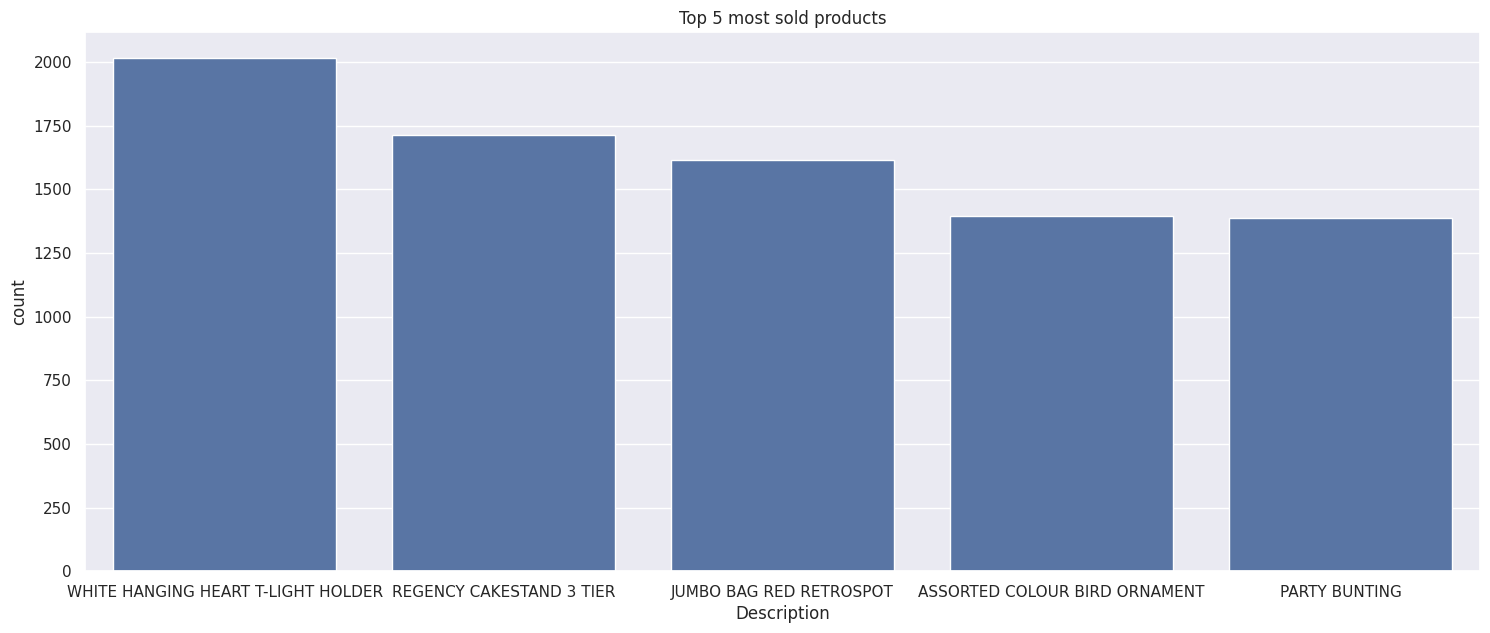

In [ ]:
# plot the top 5 most sold products
sns.barplot(x='Description', y='count', data=desc_df[:5])
plt.title('Top 5 most sold products')
plt.show()

The top 5 most sold products are:

1. White Hanging Heart T-Light Holder

2. Regency Cakestand 3 Tier

3. Jumbo Bag Red Retrospot

4. Assorted Colour Bird Ornament

5. Party Bunting

2) **Which products are the least sold ones?**

In [ ]:
# bottom 5 products
desc_df.tail()

,Description,count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


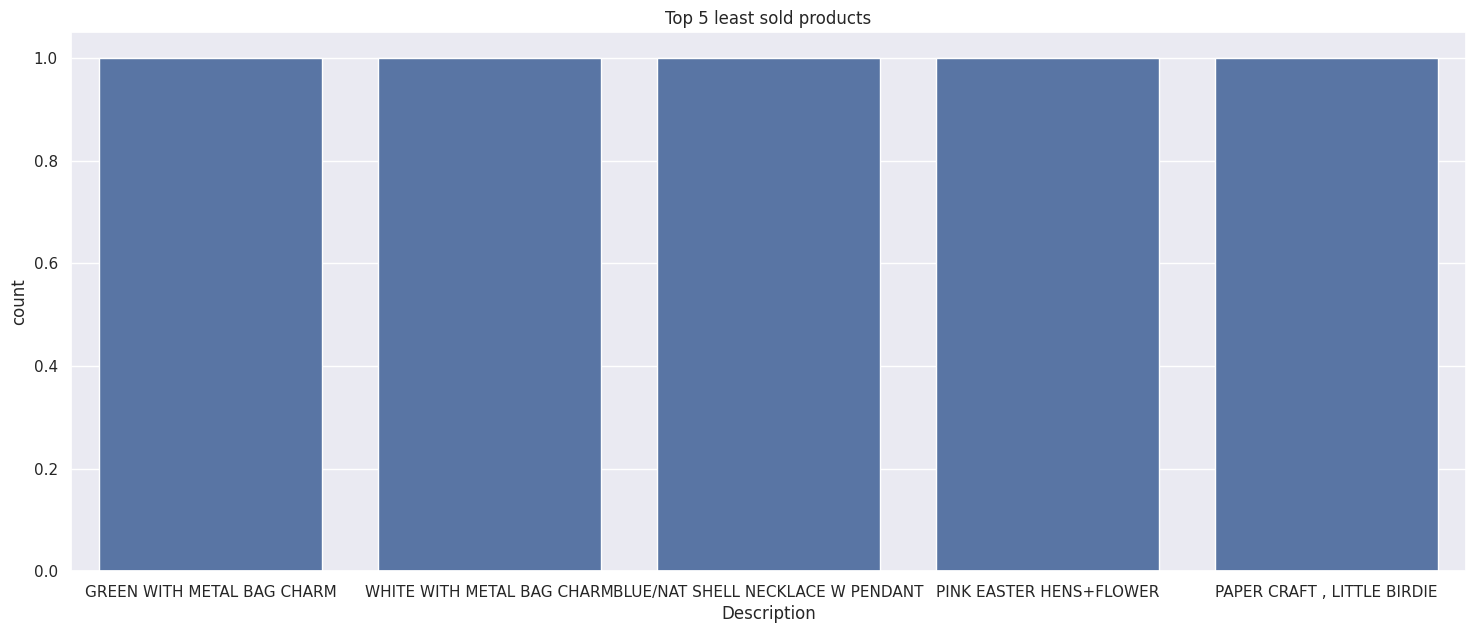

In [ ]:
# plot the top 5 least sold products
sns.barplot(x='Description', y='count', data=desc_df[-5:])
plt.title('Top 5 least sold products')
plt.show()

The top 5 least sold products are:

1. Green with Metal Bag Charm

2. White with Metal Bag Charm

3. Blue/Nat Shell Necklace W Pendant

4. Pink Easter Hens + Flower

5. Paper Craft, Little Birdie

3) **Which countries has the most number of customers?**

In [ ]:
# count of customers for each country
country_df = retail_df['Country'].value_counts().reset_index()

In [ ]:
country_df.head()

,Country,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


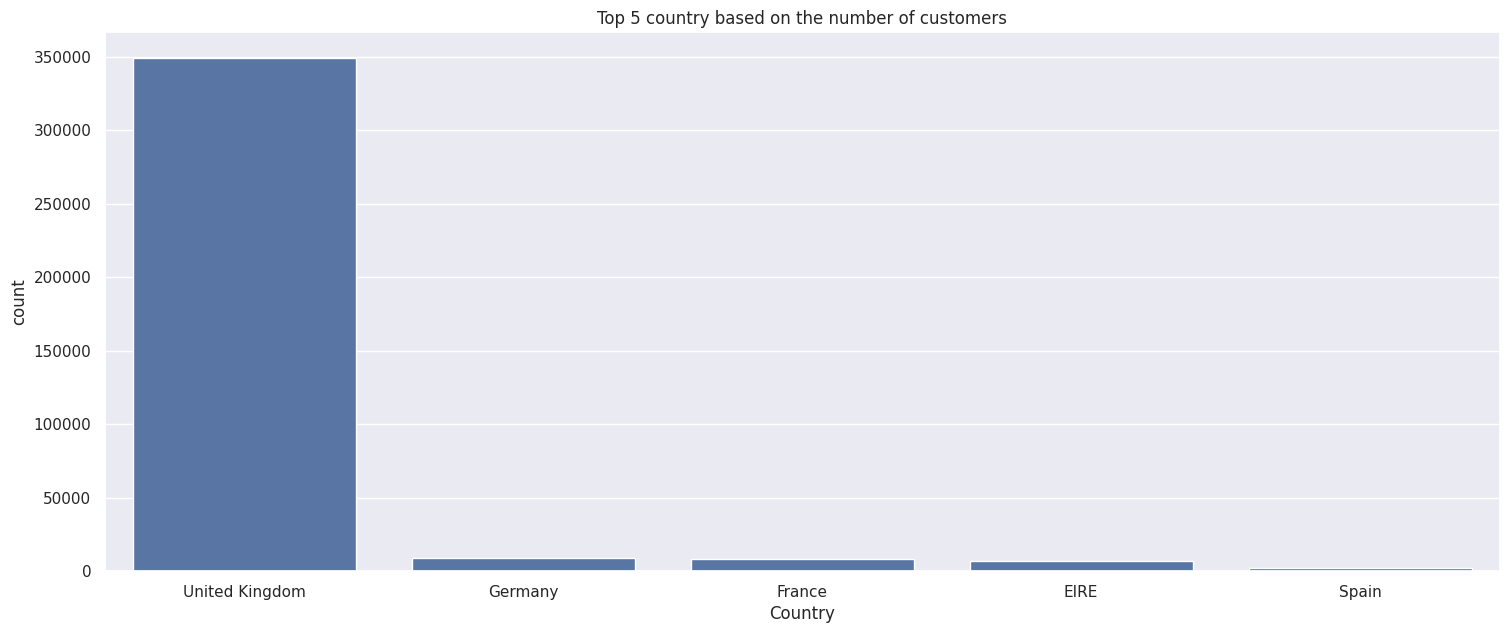

In [ ]:
# plot the top 5 country based on the number of customers
sns.barplot(x='Country', y='count', data=country_df[:5])
plt.title('Top 5 country based on the number of customers')
plt.show()

* As it is an UK based company, a huge chunk of the customers are from United Kingdom only.

* There are very few customers as compared to UK for other countries.

4) **Which countries has the least number of customers?**

In [ ]:
# bottom 5 countries based on the number of customers
country_df.tail()

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


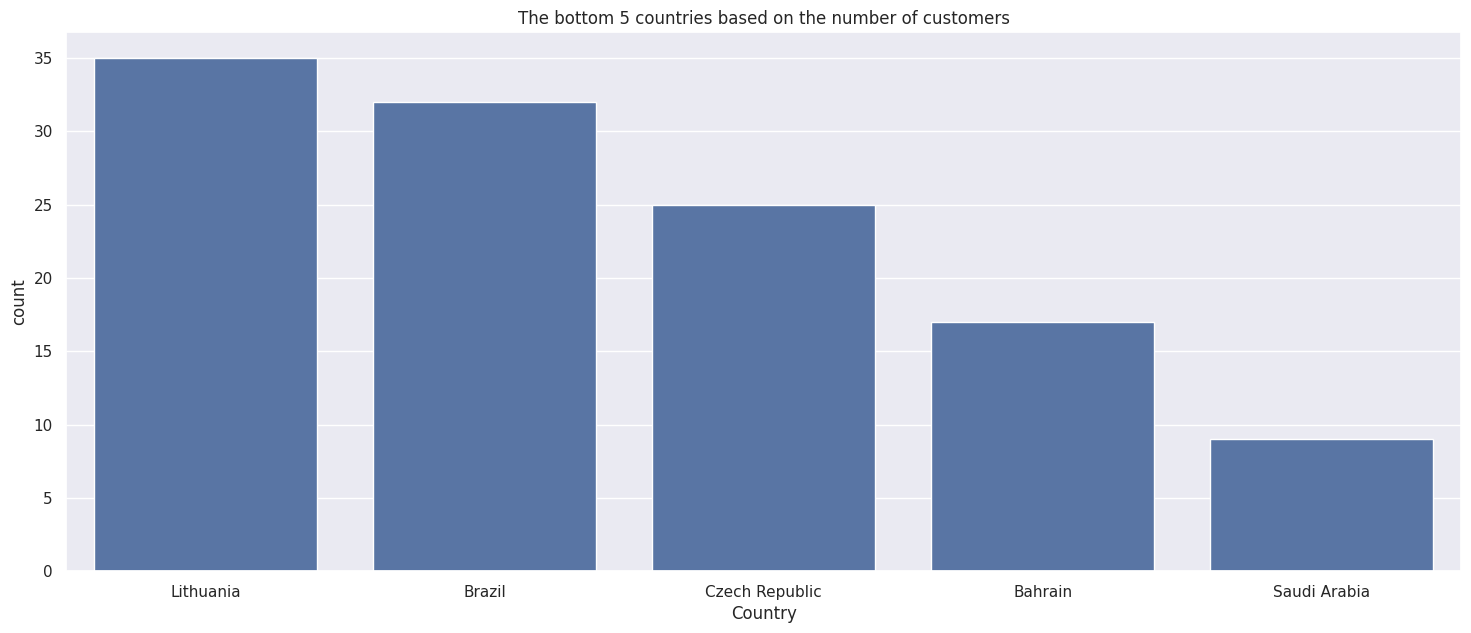

In [ ]:
# plot the bottom 5 countries based on the number of customers
sns.barplot(x='Country', y='count', data=country_df[-5:])
plt.title('The bottom 5 countries based on the number of customers')
plt.show()

* Saudi Arabia has the least number of customers followed by Bahrain.

5) **How many unique customers are there?**

In [ ]:
#How many unique customers are there?
len(retail_df['CustomerID'].unique())

4338

* There are 4338 unique customers present in the whole transactional dataset.

6) **What is the order share of the top 10 customers?**(based on no. transactions)

In [ ]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Friday,2011,12,9,12,50,December,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday,2011,12,9,12,50,December,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,2011,12,9,12,50,December,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,2011,12,9,12,50,December,16.60


In [ ]:
#number of customerIDs
retail_df['CustomerID'].value_counts().reset_index()

,CustomerID,count
0,17841.0,7676
1,14911.0,5670
2,14096.0,5111
3,12748.0,4412
4,14606.0,2677
...,...,...
4333,16765.0,1
4334,13302.0,1
4335,13270.0,1
4336,16148.0,1


In [ ]:
sum(retail_df['CustomerID'].value_counts())

392692

In [ ]:
#What is the order share of the top 10 customers?(this order share is based on no. transactions)
share_df=(retail_df['CustomerID'].value_counts()/sum(retail_df['CustomerID'].value_counts())*100).reset_index()

In [ ]:
share_df

,CustomerID,count
0,17841.0,1.954713
1,14911.0,1.443880
2,14096.0,1.301529
3,12748.0,1.123527
4,14606.0,0.681705
...,...,...
4333,16765.0,0.000255
4334,13302.0,0.000255
4335,13270.0,0.000255
4336,16148.0,0.000255


In [ ]:
share_df.columns=['CustomerID','Order_share']

In [ ]:
share_df

,CustomerID,Order_share
0,17841.0,1.954713
1,14911.0,1.443880
2,14096.0,1.301529
3,12748.0,1.123527
4,14606.0,0.681705
...,...,...
4333,16765.0,0.000255
4334,13302.0,0.000255
4335,13270.0,0.000255
4336,16148.0,0.000255


In [ ]:
share_df.head(10)

,CustomerID,Order_share
0,17841.0,1.954713
1,14911.0,1.443880
2,14096.0,1.301529
3,12748.0,1.123527
4,14606.0,0.681705
5,15311.0,0.602508
6,14646.0,0.528659
7,13089.0,0.461940
8,13263.0,0.424506
9,14298.0,0.416866


In [ ]:
share_df.head(10).cumsum()

,CustomerID,Order_share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353
5,89513.0,7.107861
6,104159.0,7.636519
7,117248.0,8.098459
8,130511.0,8.522965
9,144809.0,8.939831


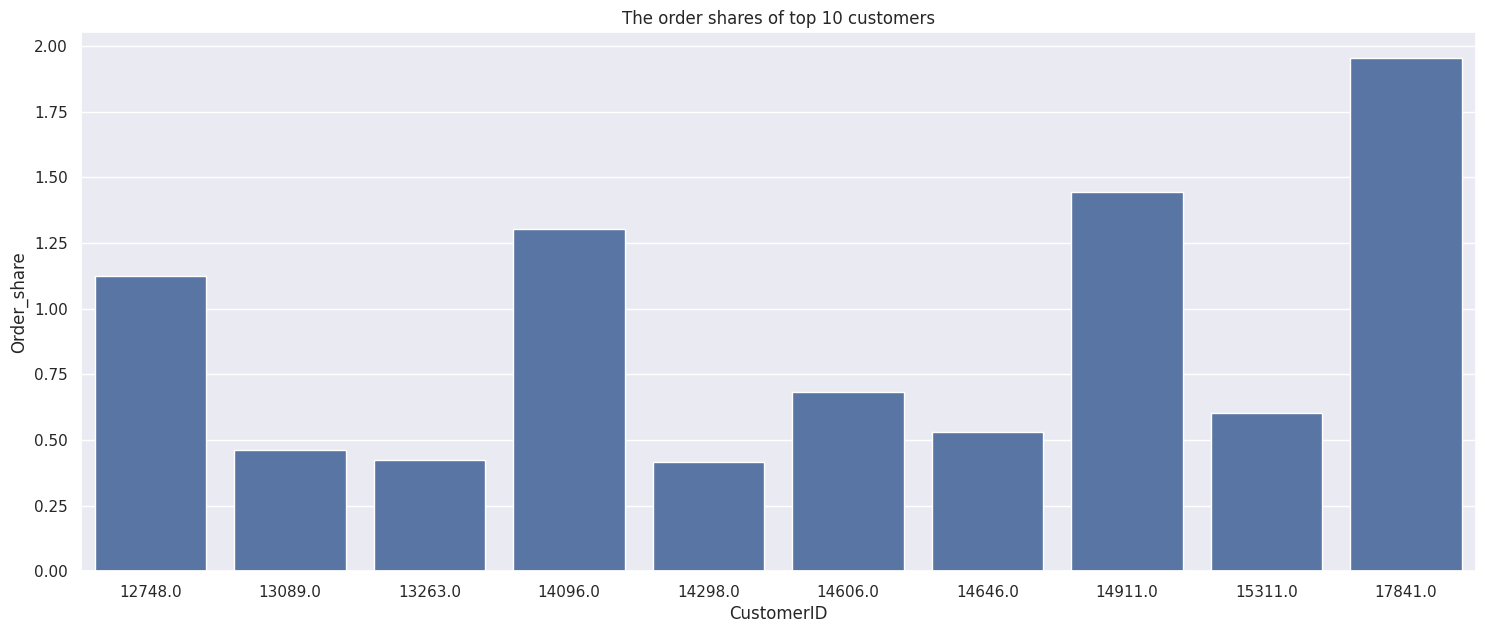

In [ ]:
# plot the top 10 customer's order share
sns.barplot(x='CustomerID', y='Order_share', data=share_df[:10])
plt.title('The order shares of top 10 customers')
plt.show()

* It can be observed that only 10 customers out of 4338 unique customers are responsible for approx 9% of the total orders.

* So, it can be inferred that these customers might be wholesalers.

### **Let us check the distribution of the numerical features:**

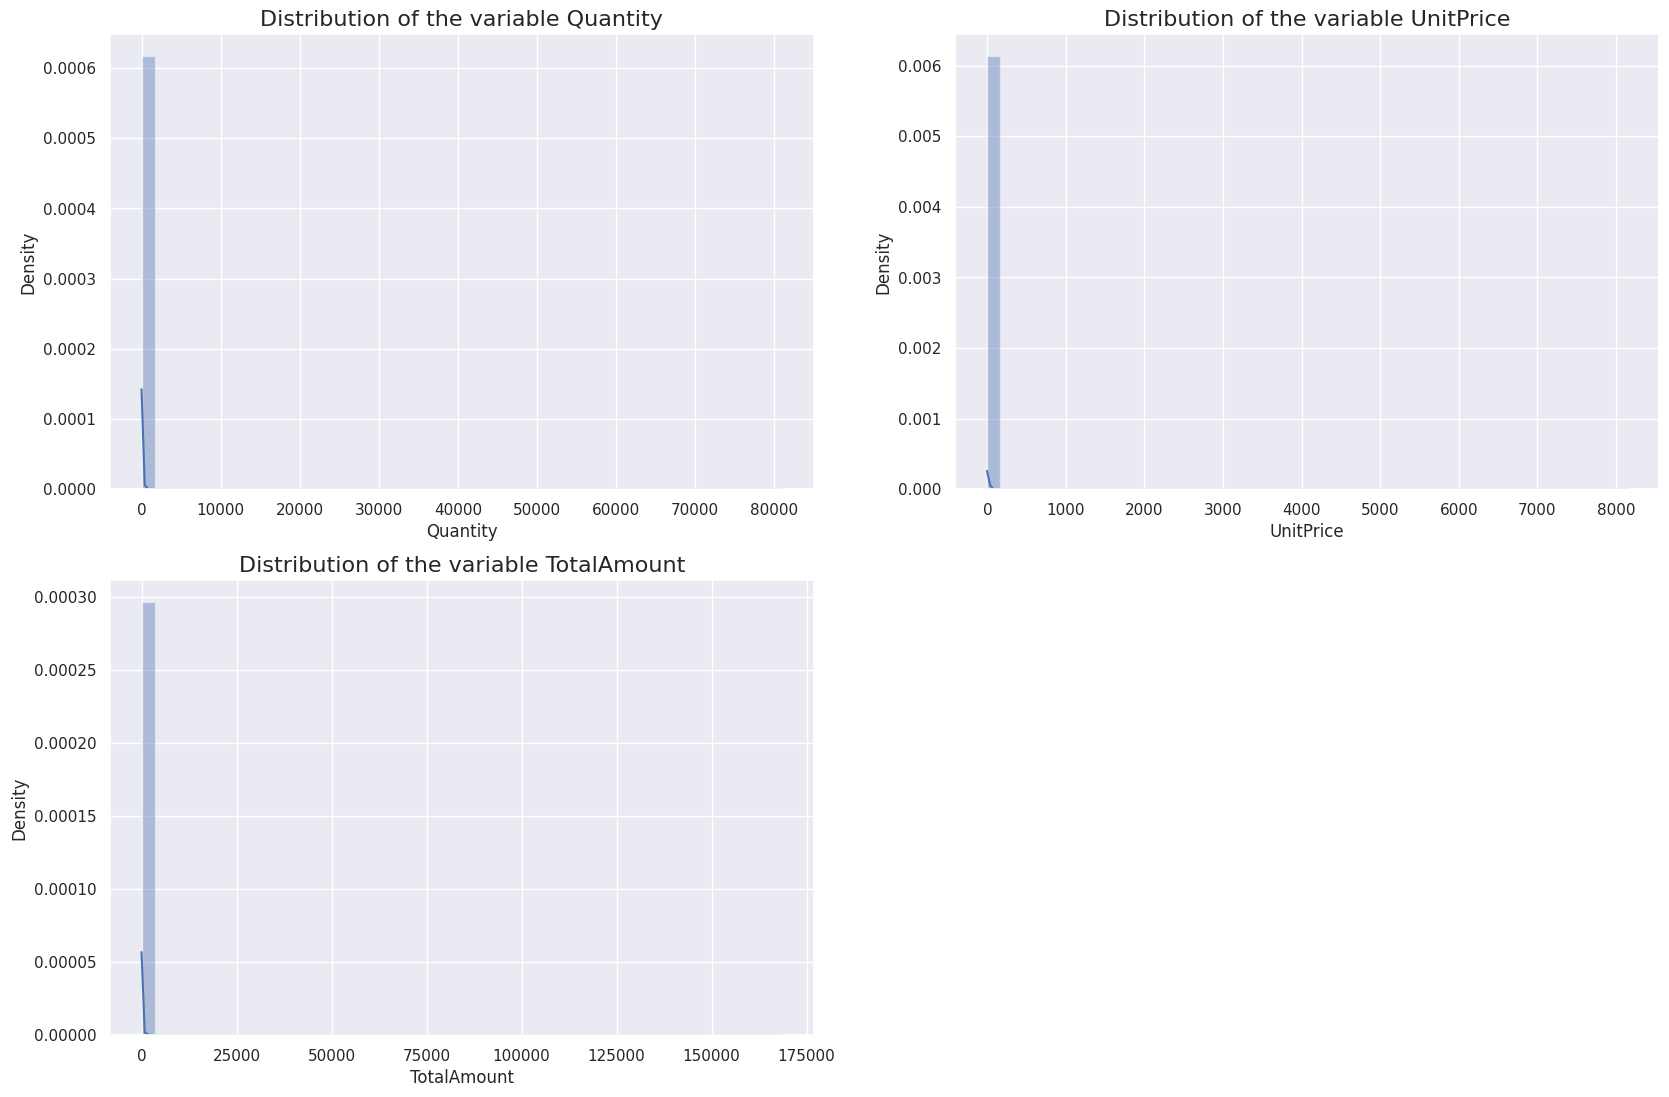

In [ ]:
# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(retail_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The distribution of all the variables are heavily right skewed.

* So applying log transformation on these variables to make it less skewed.

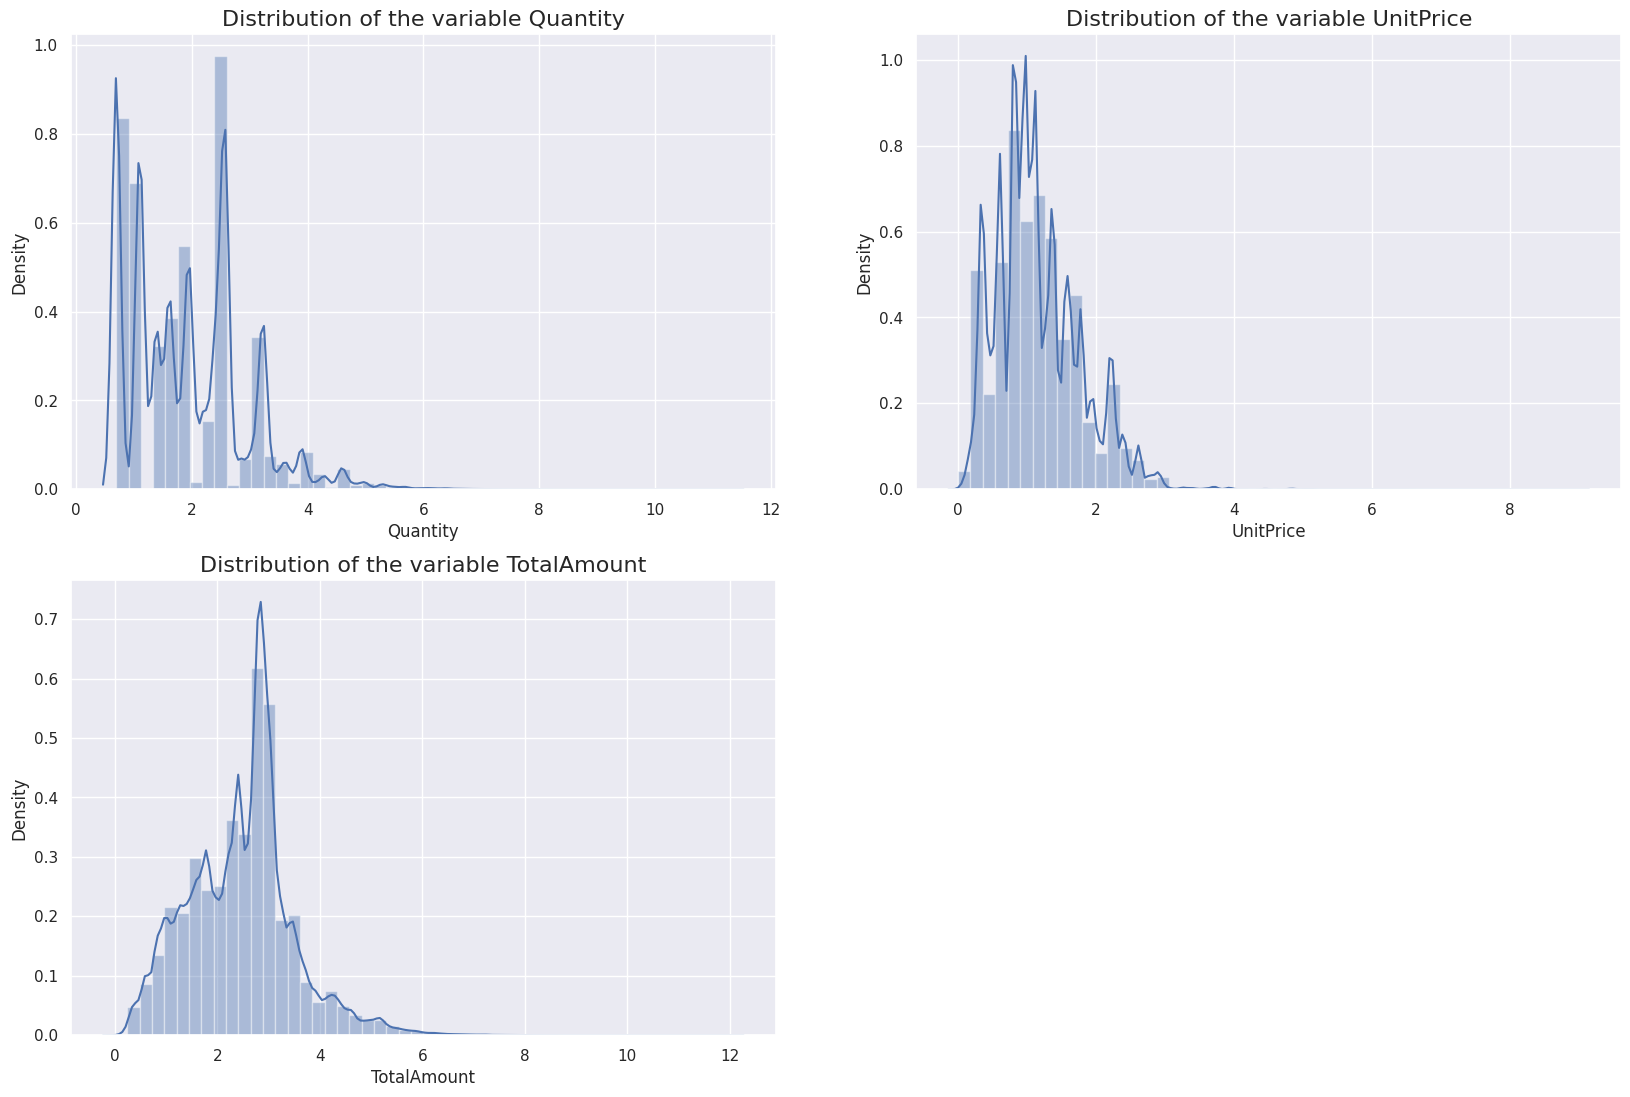

In [ ]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(retail_df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The variables after log transformation are less skewed than before.

* It isn't a normal distribution but somewhat close to that than before.

7) **Which day of the week had the most and the least number of purchases?**

In [ ]:
day_df=retail_df['day'].value_counts().reset_index()

In [ ]:
day_df

,day,count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


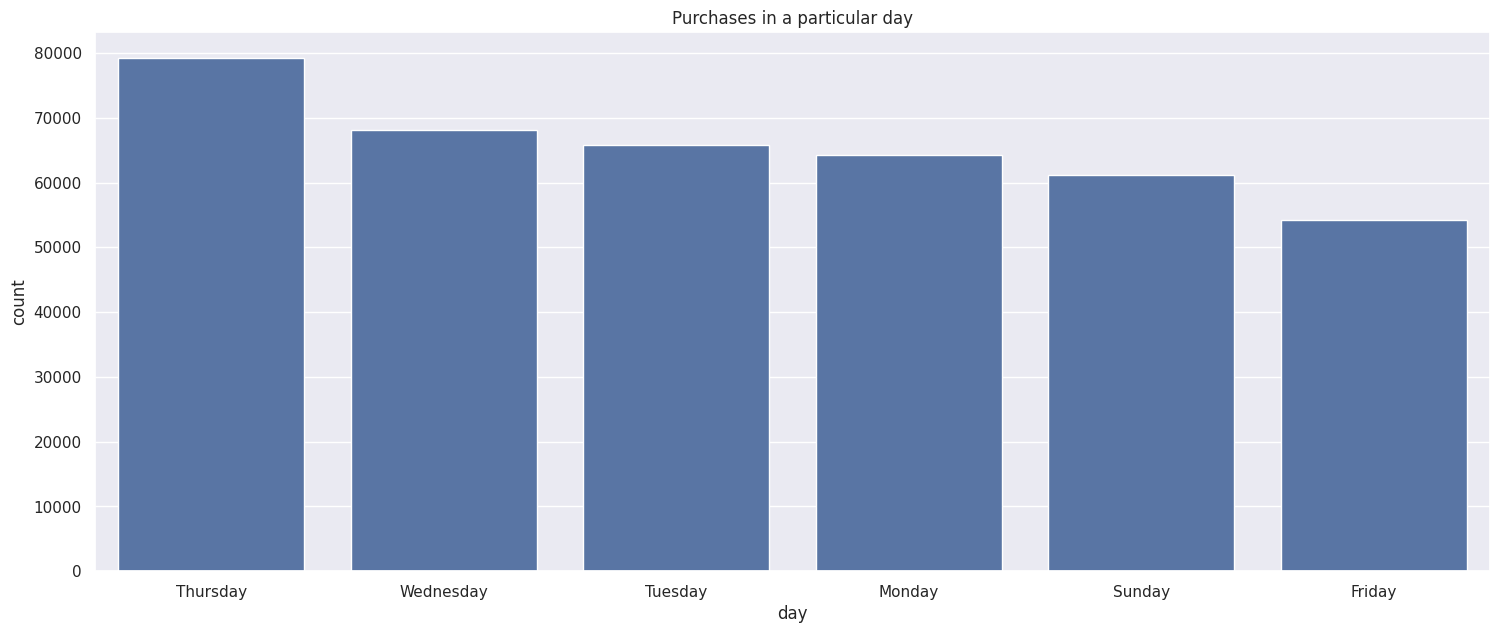

In [ ]:
# plot the number of purchases w.r.t day of the week
sns.barplot(x='day', y='count', data=day_df)
plt.title('Purchases in a particular day')
plt.show()

* Most of the customers have made a purchase in Thursday followed by Wednesday.

* Friday is the day with least number of purchases made.

8) **Which month had the most and the least number of purchases?**

In [ ]:
month_df = retail_df['month'].value_counts().reset_index()

In [ ]:
month_df

,month,count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


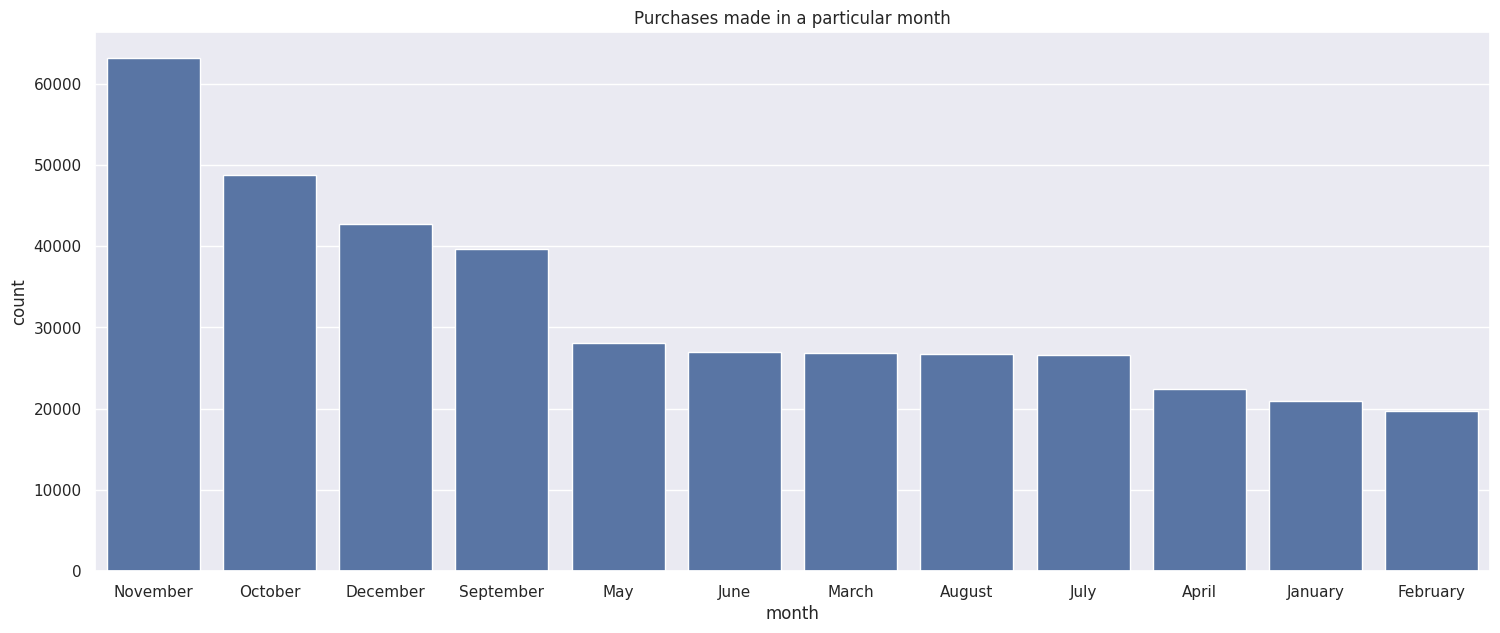

In [ ]:
# plot the number of purchases w.r.t month
sns.barplot(x='month', y='count', data=month_df)
plt.title('Purchases made in a particular month')
plt.show()

* The most number of purchases are made during October to December which is a festive season for many people.

* The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

9) **Which hour of the day had the most and the least number of purchases?**

In [ ]:
hour_df=retail_df['hour'].value_counts().reset_index()

In [ ]:
hour_df

,hour,count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


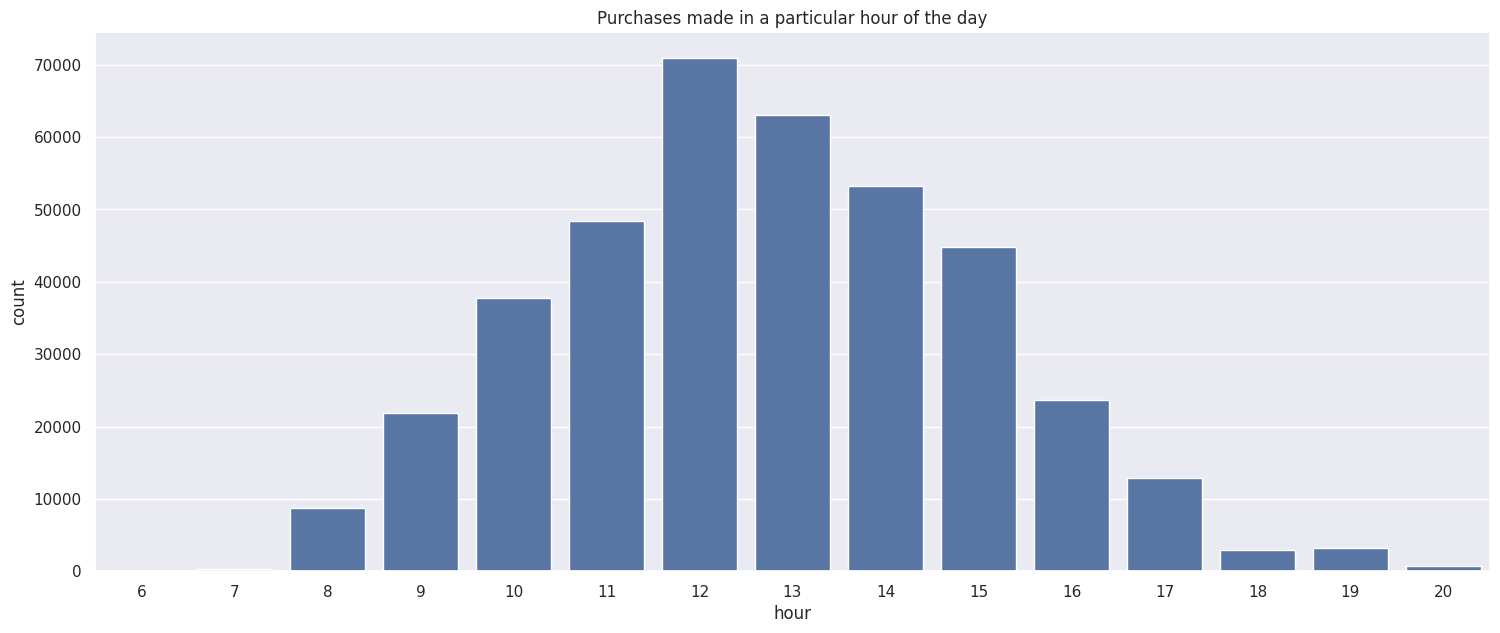

In [ ]:
# plot the number of purchases w.r.t hour of the day
sns.barplot(x='hour', y='count', data=hour_df)
plt.title('Purchases made in a particular hour of the day')
plt.show()

* Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

* This hour graph can be divided into morning, afternoon and evening buckets.

In [ ]:
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
retail_df['time_day'] = retail_df['hour'].apply(time_day)
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Friday,2011,12,9,12,50,December,10.20,Afternoon
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday,2011,12,9,12,50,December,12.60,Afternoon
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,2011,12,9,12,50,December,16.60,Afternoon
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,2011,12,9,12,50,December,16.60,Afternoon


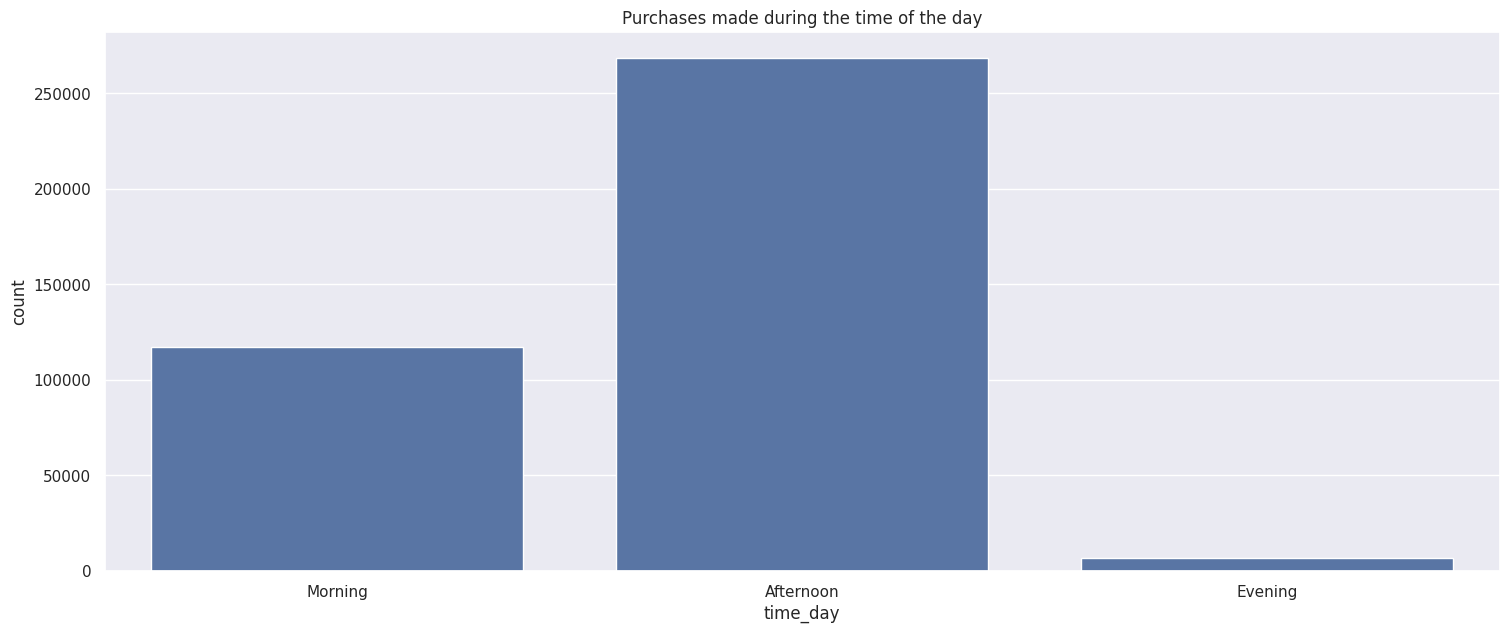

In [ ]:
# plot the number of purchases w.r.t hour again
sns.countplot(x='time_day', data=retail_df)
plt.title('Purchases made during the time of the day')
plt.show()

* Now, it is more clear that most of the purchases has occurred during the Afternoon followed by Morning and the least number of purchases during Evening.

##**RFM Model (Recency, Frequency and Monetary):**

Let us create the RFM Model for further usage



*   Few points regarding the RFM model



In [ ]:
#The RFM model is based on three quantitative factors:
#1)Recency: How recently a customer has made a purchase
#2)Frequency: How often a customer makes a purchase
#3)Monetary Value: How much money a customer spends on purchases

In [ ]:
#RFM analysis numerically ranks a customer in each of these three categories,
#generally on a scale of 1 to 5 (the higher the number, the better the result).
#The "best" customer would receive a top score in every category.

#### **Filter UK data only:**

Being a UK based retail store and as most of the customers or a huge chunk of customers are from UK, we have decided to consider the UK based customers only for segmentation.

In [ ]:
# filter UK data only
modified_retail_df = retail_df[retail_df['Country'] == 'United Kingdom']

# print the shape of the data
modified_retail_df.shape

(349203, 17)

**Calculating RFM Scores:**

In [ ]:
#Setting latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = modified_retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})#Here,".days" is used  as we want the diff in no. of days.

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [ ]:
rfm_df.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3915,18280.0,277,10,180.60
3916,18281.0,180,7,80.82
3917,18282.0,7,12,178.05
3918,18283.0,3,721,2045.53


In [ ]:
# descriptive stats of the rfm dataframe
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,298.185000
50%,50.000000,40.000000,644.975000
75%,142.000000,98.000000,1571.285000
max,373.000000,7676.000000,259657.300000


**Plotting the distribution of Recency, Frequency and Monetary Value:**

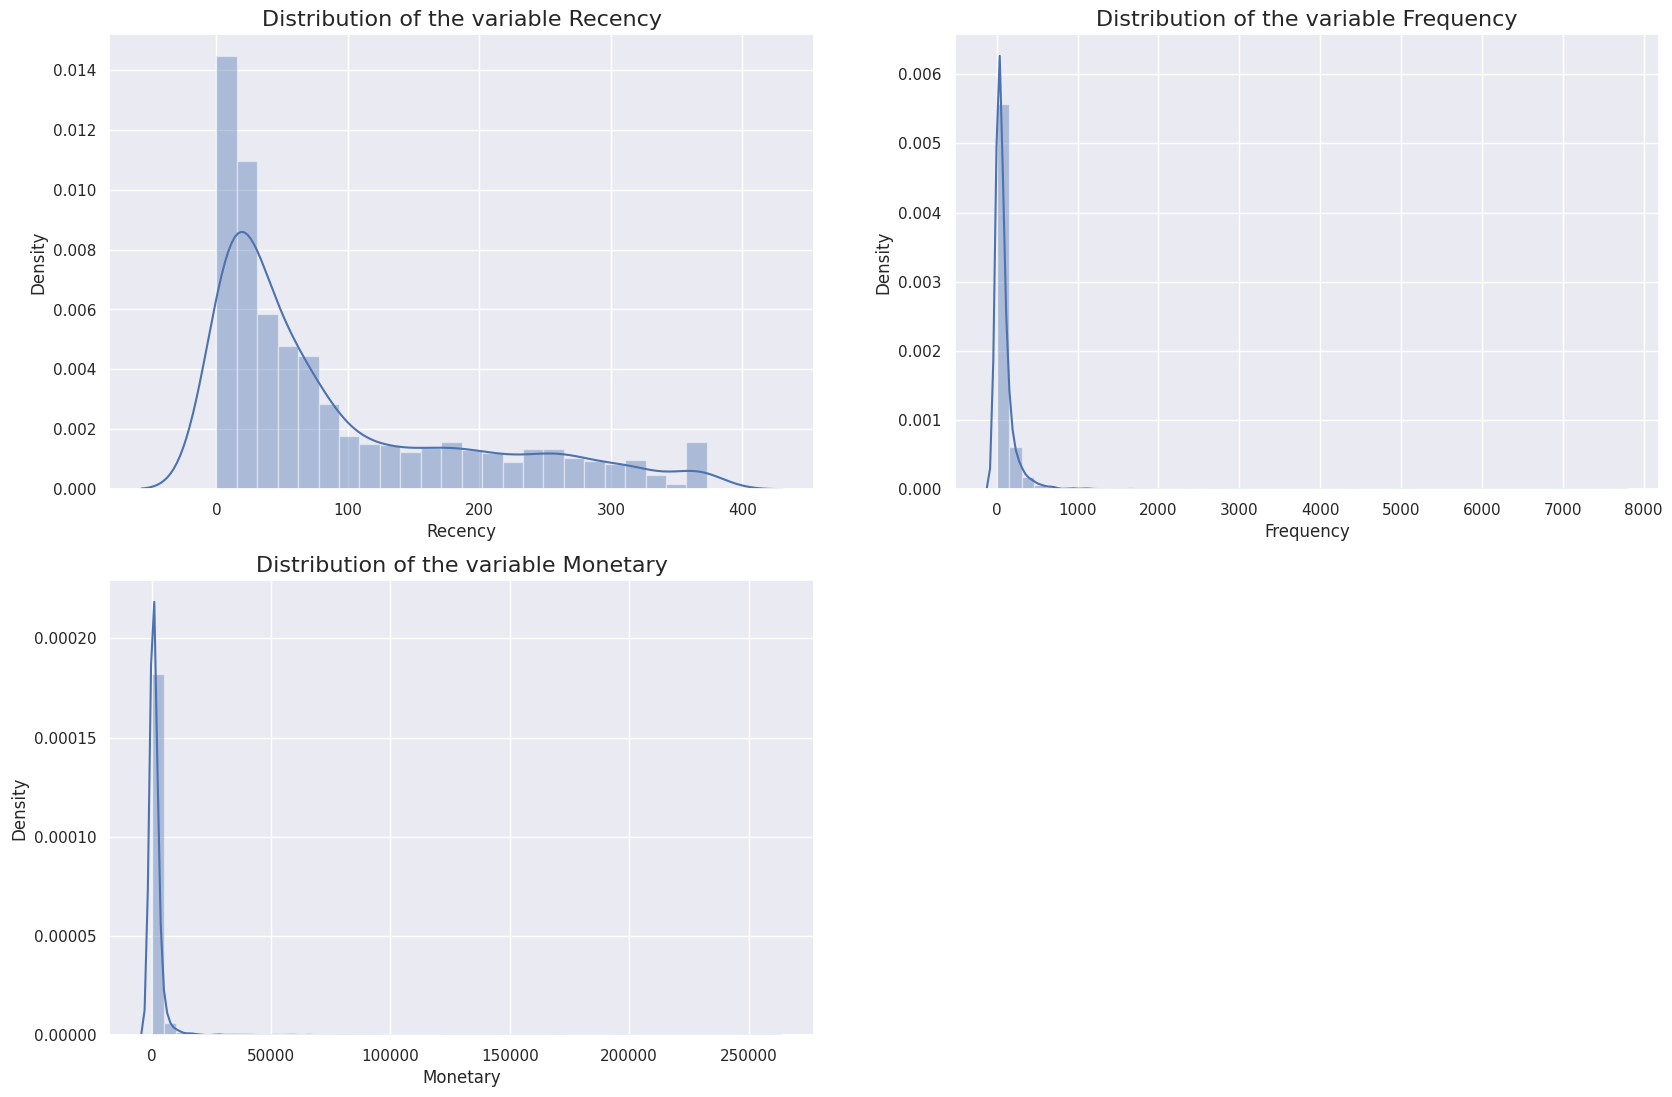

In [ ]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

In [ ]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

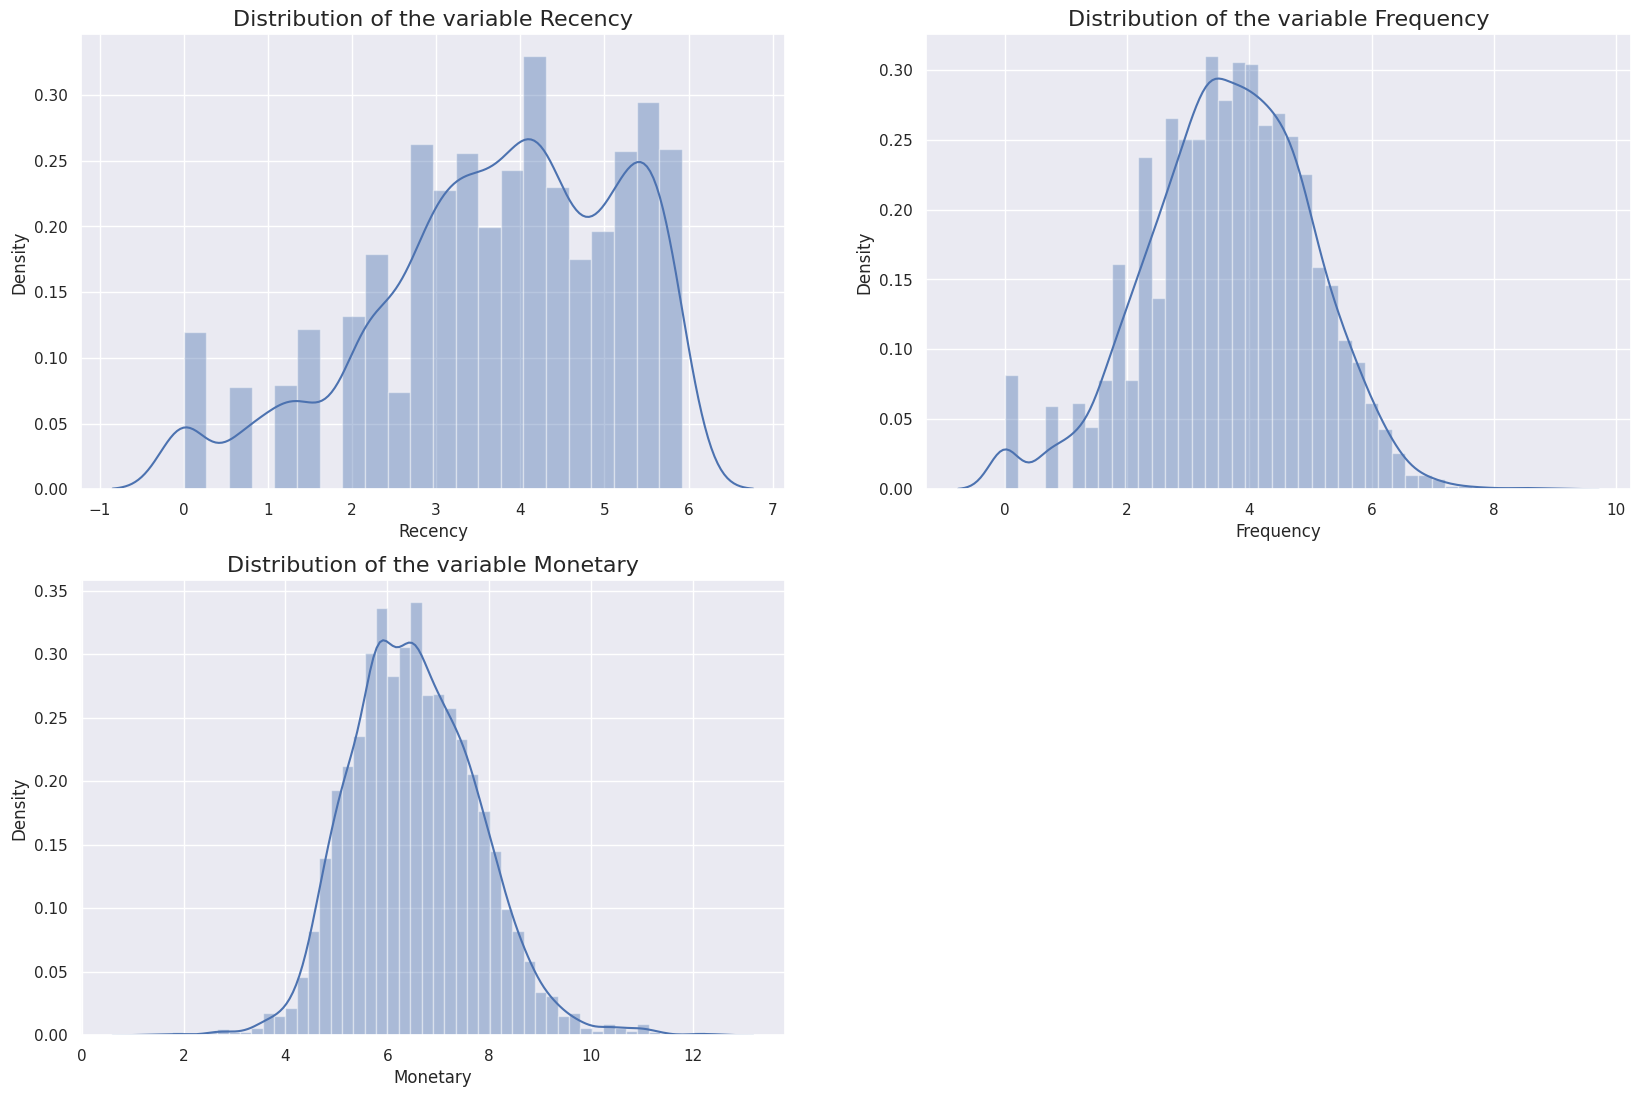

In [ ]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The distribution of Recency, Frequency and Monetary values almost looks
normal now. The skewness is almost removed.

In [ ]:
# apply log transformation on the original rfm dataframe
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
# display the rfm_df
rfm_df

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,1.098612,5.293305,8.316515
12820.0,3,59,942.34,1.098612,4.077537,6.848366
...,...,...,...,...,...,...
18280.0,277,10,180.60,5.624018,2.302585,5.196285
18281.0,180,7,80.82,5.192957,1.945910,4.392224
18282.0,7,12,178.05,1.945910,2.484907,5.182064


In [ ]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']
# scaling our data i.e. scaling of all the features that we'll be using in K-means Clustering
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)



*  We are performng clustering here to figure out how many different categories of clusters of customers are there.

*  These categories will be based on "recency_log", "frequency_log", "monetary_log".





*   As we are not knowing the no. of clusters beforehand so we will be using Elbow Method to know how many clusters of customers will be formed.



### **Applying Elbow method on Recency, Frequency and Monetary:**

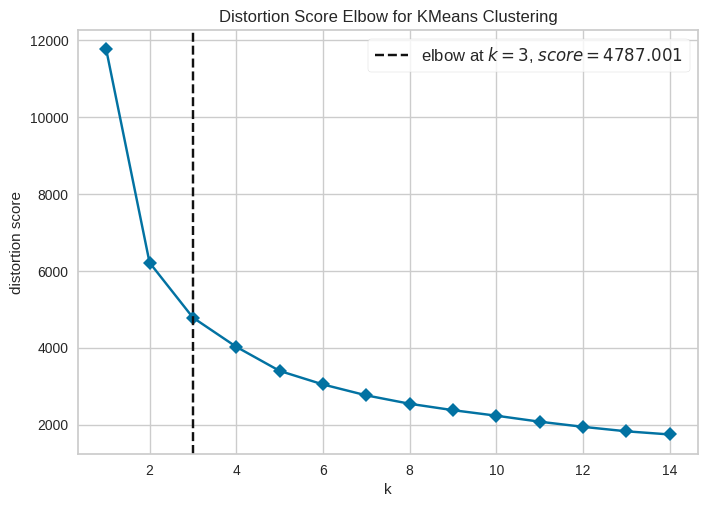

In [ ]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

* From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

* We will again run the model with number of clusters as 3.

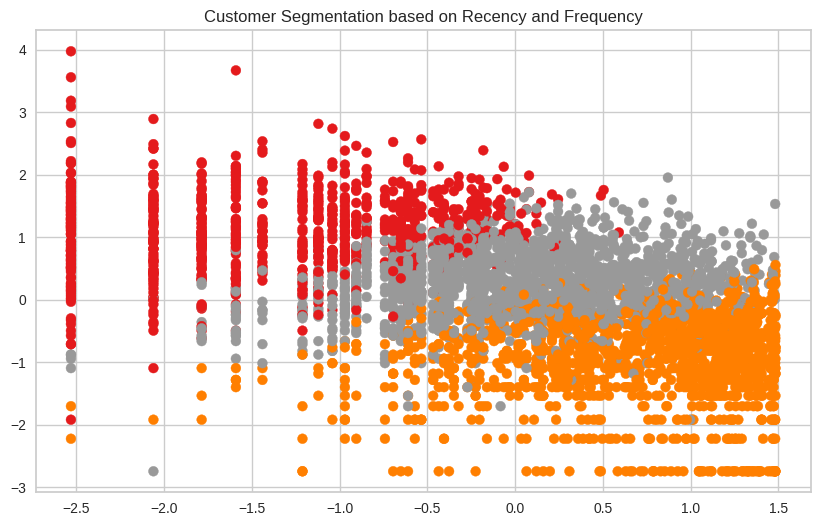

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

Clusters can be noticed but to make it more clear lets do some cosmetic changes

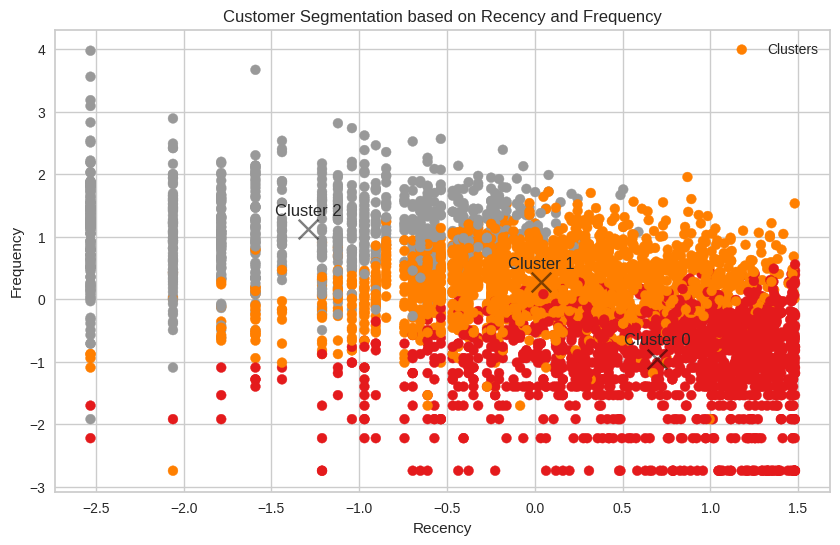

In [ ]:
# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')
# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

### **Interpreting the Clusters with the help of RFM Group:**

Now, split the RFM values into four quantiles, and then we'll rank these becoz it will be easier for us to understand and do interpretation in accordance with th rank as that woul maintain uniformity.

In [ ]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()


*  This is method of ranking the Recency,Frequency,Monatary values.
*   As higher the freq and monatary feature the better it is.
*   And the lower the recency value feature the better it is.
*   Thus, we have the "RScore" for recency and "FnMScore" for Monatary & Frequency features.





In [ ]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

Now apply above function on the dataframe and creating new columns

In [ ]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2


#### **Calculate RFM Group and RFM Score from the RFM segmentation:**

In [ ]:
rfm_df

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1
12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1
12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1
12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,5.624018,2.302585,5.196285,4,4,4
18281.0,180,7,80.82,5.192957,1.945910,4.392224,4,4,4
18282.0,7,12,178.05,1.945910,2.484907,5.182064,1,4,4


Calculating RFM score:

method1) rfm_df['RFMScore'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

OR

method2) calculate RFM score from RFM group column

In [ ]:
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,9
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,3
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,3
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,3
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,277,10,180.60,5.624018,2.302585,5.196285,4,4,4,12
3916,18281.0,180,7,80.82,5.192957,1.945910,4.392224,4,4,4,12
3917,18282.0,7,12,178.05,1.945910,2.484907,5.182064,1,4,4,9
3918,18283.0,3,721,2045.53,1.098612,6.580639,7.623412,1,1,1,3


*   Lower the RFMScore the better it is.
*   The best RFMScore will be = 3
*   The worst RFMScore will be = 12




In [ ]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_

In [ ]:
rfm_df.reset_index()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore,Cluster
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,9,1
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,3,2
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,3,2
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,3,2
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,277,10,180.60,5.624018,2.302585,5.196285,4,4,4,12,0
3916,18281.0,180,7,80.82,5.192957,1.945910,4.392224,4,4,4,12,0
3917,18282.0,7,12,178.05,1.945910,2.484907,5.182064,1,4,4,9,0
3918,18283.0,3,721,2045.53,1.098612,6.580639,7.623412,1,1,1,3,2


In [ ]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
Cluster,,,,,,,,,,
0,165.282744,15.119196,286.190805,4.759947,2.386550,5.410671,3.298683,3.629245,3.564103,10.492030
1,67.853600,69.166969,1199.700365,3.787118,4.012225,6.770923,2.425287,2.156685,2.198427,6.780399
2,10.912621,258.559466,5933.187633,1.830261,5.151263,8.043445,1.207524,1.288835,1.241505,3.737864



### **Business Conclusion:**

1. **Cluster 0**:
   - **Recency**: High (average around 165 days)
   - **Frequency**: Low (average around 15 transactions)
   - **Monetary**: Low (average around $286)
   - **Interpretation**: Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.

2. **Cluster 1**:
   - **Recency**: Moderate (average around 68 days)
   - **Frequency**: Moderate (average around 69 transactions)
   - **Monetary**: Moderate (average around $1200)
   - **Interpretation**: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.


3. **Cluster 2**:
   - **Recency**: Very Low (average around 11 days)
   - **Frequency**: Very High (average around 259 transactions)
   - **Monetary**: Very High (average around $5933)
   - **Interpretation**: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.


**Overall Strategy**:
- **Cluster 0 ('At-Risk/Lapsed')**: Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.
- **Cluster 1 ('Potential Loyalists/Promising')**: Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.
- **Cluster 2 ('Champions/Loyal')**: Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.

**Thank You**